Problem statement:

-To predict if an insurance claim is fraduluent or not.

In [189]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv('InsuranceClaims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
#looking for variables

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Preprocessing:

In [4]:
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
768,446,61,259792,07-04-1999,IL,100/300,1000,1232.79,0,441967,...,YES,70500,7050,14100,49350,Suburu,Forrestor,2007,N,NaN
684,313,47,431478,03-04-2013,IN,250/500,1000,1556.17,0,463835,...,NO,40260,3660,7320,29280,Accura,MDX,1996,Y,NaN
139,124,32,756054,06-06-1992,IL,250/500,1000,1198.15,0,447925,...,YES,73560,12260,12260,49040,BMW,X5,1995,N,NaN
803,123,29,379268,05-08-2012,IN,250/500,500,1209.63,0,447188,...,YES,73260,16280,0,56980,Volkswagen,Jetta,2014,Y,NaN
904,97,27,175553,25-04-2002,OH,500/1000,500,1588.26,0,434370,...,YES,75690,8410,8410,58870,Saab,95,2014,N,NaN
465,33,33,758740,04-08-1997,IL,500/1000,1000,1096.79,6000000,446898,...,?,81400,8140,8140,65120,BMW,M5,1998,N,NaN
833,126,28,596914,05-01-1992,IN,250/500,500,1508.90,0,472814,...,?,67800,11300,11300,45200,Ford,F150,2011,N,NaN
727,39,22,691115,28-01-1993,IN,500/1000,500,1173.21,0,431202,...,YES,86130,15660,7830,62640,Suburu,Legacy,2009,Y,NaN
198,328,48,630226,10-12-2005,IL,250/500,500,1411.43,0,464874,...,NO,59400,5940,11880,41580,Honda,Civic,2014,N,NaN
949,407,55,193213,11-03-1996,OH,100/300,1000,1250.08,5000000,474598,...,YES,68160,11360,11360,45440,Ford,Escape,2010,N,NaN


In [5]:
#checking for datatype

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- policy_blind_date is in object datatype so lets first change it

In [6]:
import datetime

df['Day']=pd.to_datetime(df['policy_bind_date']).dt.day
df['Month']=pd.to_datetime(df['policy_bind_date']).dt.month
df['Year']=pd.to_datetime(df['policy_bind_date']).dt.year

#now dropping the date variable as now it has no use

df.drop('policy_bind_date',axis=1,inplace=True)

In [7]:
df.sample()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Day,Month,Year
76,270,45,166264,OH,500/1000,1000,1038.09,0,476978,FEMALE,...,7450,67050,Suburu,Legacy,1998,N,NaN,1,12,2010


In [8]:
#checking for null values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

In [9]:
df.shape

(1000, 42)

- _c39 variable has all values as NaN, so we will drop it

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

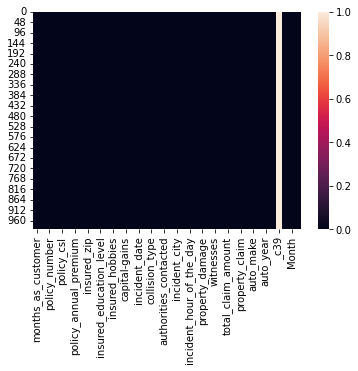

In [11]:
sns.heatmap(df.isnull())

In [12]:
#dropping _c39

df.drop('_c39',axis=1,inplace=True)


In [15]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [24]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [22]:
#changing the datatype for incident_date

df['incident_date']=pd.to_datetime(df['incident_date'])

In [23]:
#creating empty list for categorical and continuous variables

cat=[]
intt=[]

for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    elif df[i].dtypes=='float64'or'int64':
        intt.append(i)
    else:
        pass

print(cat,'\n')
print(intt)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'] 

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_date', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Day', 'Month', 'Year']


In [25]:
#checking for unique value counts

for i in cat:
    print(df[i].value_counts(),'\n','\n')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 
 

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 
 

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 
 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 
 

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 
 

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games     

In [26]:
#first we will do EDA for better understanding then we will labelEncode the object dtype variables

# EDA:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

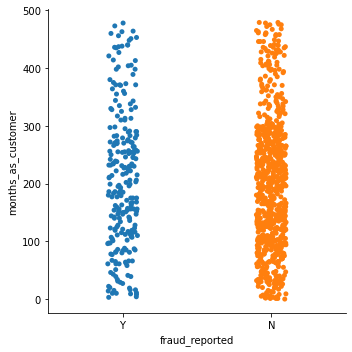

In [28]:
sns.catplot('fraud_reported','months_as_customer',data=df)
plt.show()

- it can be seen that the data is imbalanced

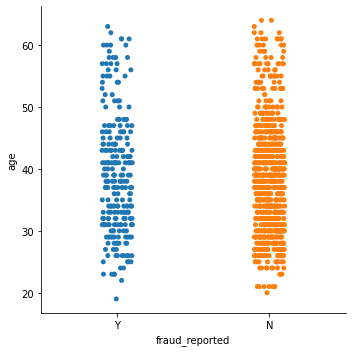

In [31]:
sns.catplot('fraud_reported','age',data=df)
plt.show()

- young age people reported less for Frauds

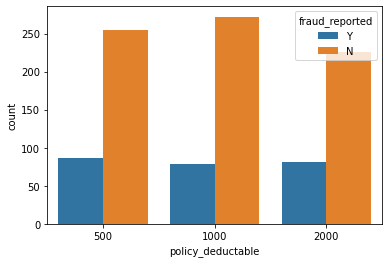

In [190]:
sns.countplot('policy_deductable',data=df,hue=df['fraud_reported'])
plt.show()

- the data is imbalanced
- all classes of policy_deductable have similar fraud Yes reports

In [191]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

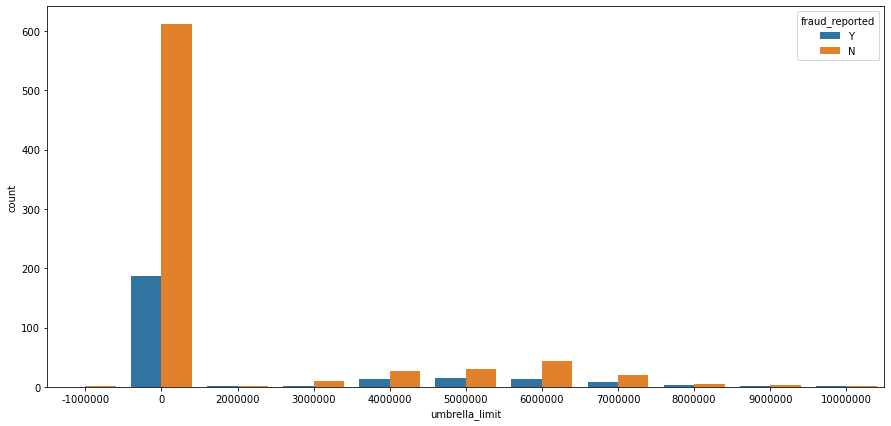

In [193]:
plt.figure(figsize=(15,7))
sns.countplot('umbrella_limit',data=df,hue=df['fraud_reported'])
plt.show()

- data for umbrella_limit is also imbalanced
- umbrella limit zero has the most count while all other limits have very low count
- skewness must be present

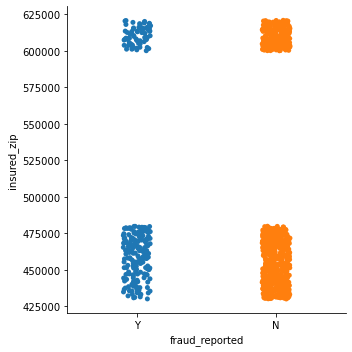

In [36]:
sns.catplot('fraud_reported','insured_zip',data=df)
plt.show()

- insured_zip range 50000 to 575000  have no data

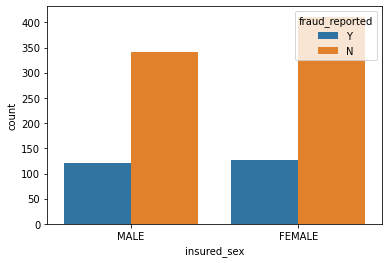

In [37]:
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])
plt.show()

- equal number of Male and Females is present in the dataset

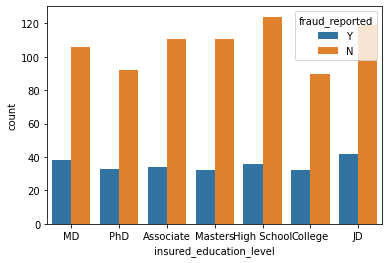

In [38]:
sns.countplot(df['insured_education_level'],hue=df['fraud_reported'])
plt.show()

- HighSchool , JD education level customers have higher Yes fraud reported

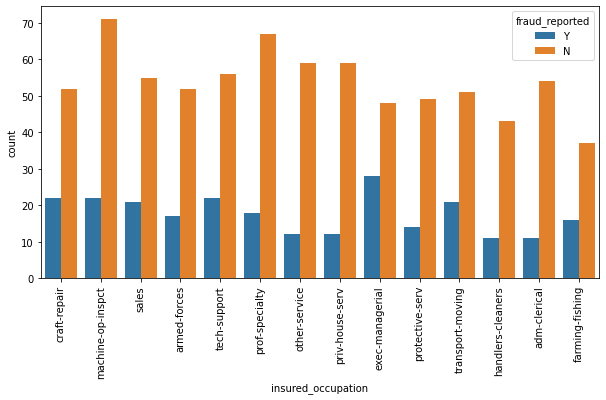

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df['insured_occupation'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- exec managerial has the highest Yes fraud reported count, handlers/cleaners have least

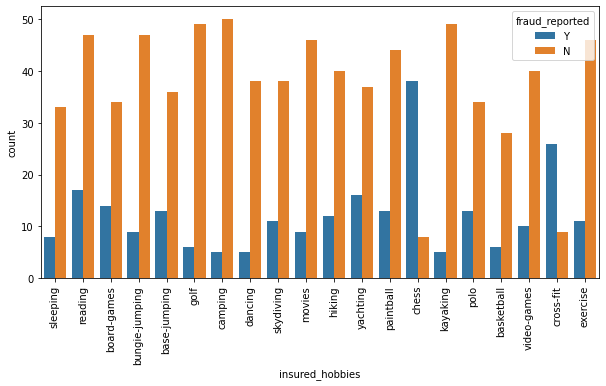

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(df['insured_hobbies'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- customers reported as Yes fraud have common hobby
- kayaking hobby interested customers have least fraud Yes reports

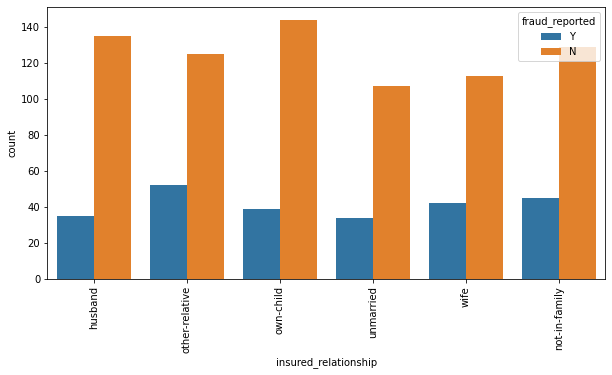

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(df['insured_relationship'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- NotinFamily and other relative have highest Yes fraud count, husband , unmarried have least

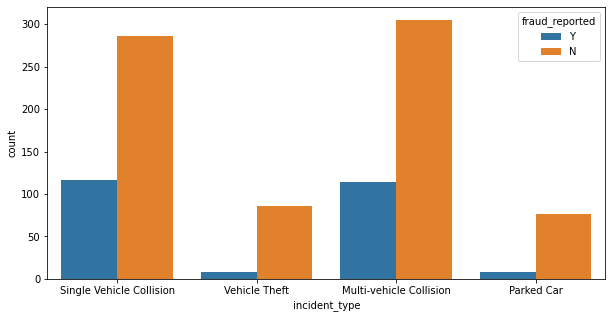

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(df['incident_type'],hue=df['fraud_reported'])

plt.show()

- most fraud came from Single or multi vehicle collisioms
- Vehicle Theft and Parked car have so low fraud report

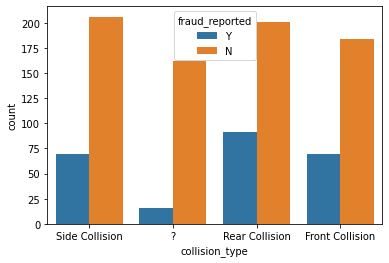

In [49]:
sns.countplot(df['collision_type'],hue=df['fraud_reported'])

plt.show()

- most frauds collision type is Rear Collision following by Side and Front collision

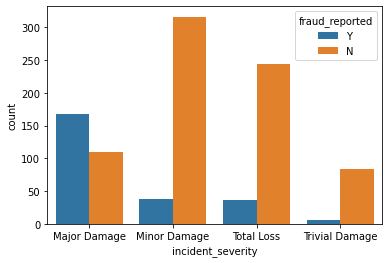

In [50]:
sns.countplot(df['incident_severity'],hue=df['fraud_reported'])
plt.show()

- most frauds damage type is Major damage
- Trivial damage has very low fraud reports

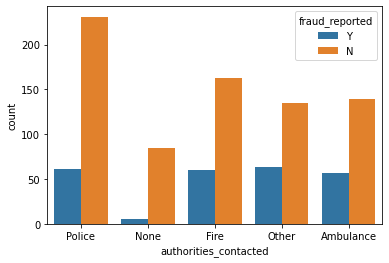

In [51]:
sns.countplot(df['authorities_contacted'],hue=df['fraud_reported'])
plt.show()

- in most fraud reports most of the authorities have been contacted
- this data might be weakly correlated with the target variable

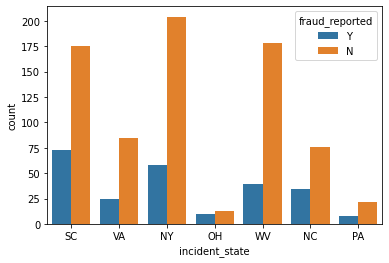

In [52]:
sns.countplot(df['incident_state'],hue=df['fraud_reported'])
plt.show()

- most fraud reports came out from state SC, low reports from states OH and PA

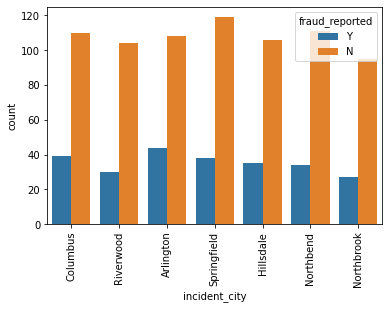

In [54]:
sns.countplot(df['incident_city'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- Arlington city have the most fraud reports

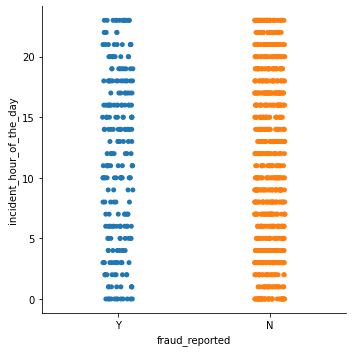

In [57]:
sns.catplot('fraud_reported','incident_hour_of_the_day',data=df)
plt.show()

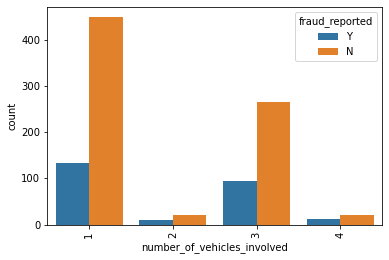

In [60]:
sns.countplot(df['number_of_vehicles_involved'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- 1 number of vehicle involved has most fraud reports following by 3 number of vehicles involved
- 2 number of vehicles involved has the least fraud reports

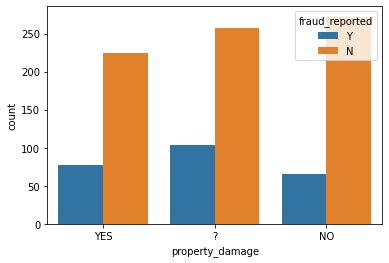

In [61]:
sns.countplot(df['property_damage'],hue=df['fraud_reported'])
plt.show()

- ? property damage has the most fraud reports

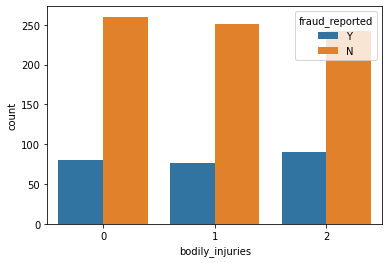

In [63]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])
plt.show()

- 2 bodily injuries has the most fraud reports, 0 and 1 have almost equal fraud reports

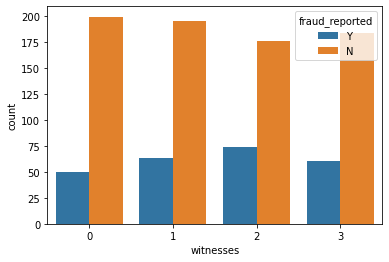

In [64]:
sns.countplot(df['witnesses'],hue=df['fraud_reported'])
plt.show()

- most fraud reports had 2 witnesses, witnessing the incident

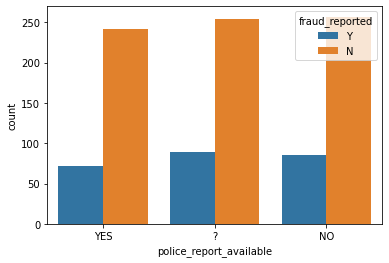

In [65]:
sns.countplot(df['police_report_available'],hue=df['fraud_reported'])
plt.show()

- both NO and ? police_report_available have more fraud reports

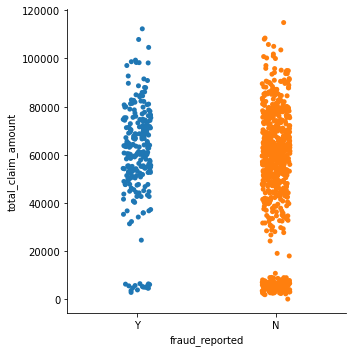

In [66]:
sns.catplot('fraud_reported','total_claim_amount',data=df)
plt.show()

- for smaller claim amounts, fraud reports are less

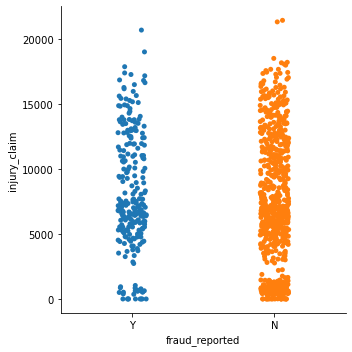

In [67]:
sns.catplot('fraud_reported','injury_claim',data=df)
plt.show()

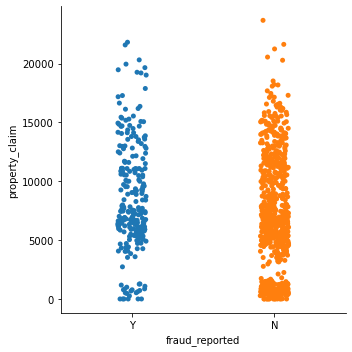

In [68]:
sns.catplot('fraud_reported','property_claim',data=df)
plt.show()

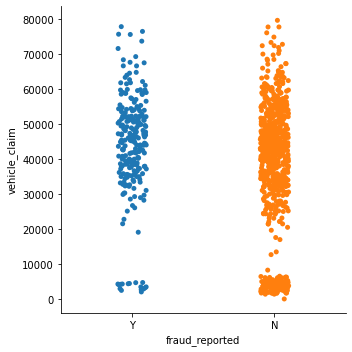

In [69]:
sns.catplot('fraud_reported','vehicle_claim',data=df)
plt.show()

- observation:
- less money less fraud reports
- more or higher money value more fraud reports

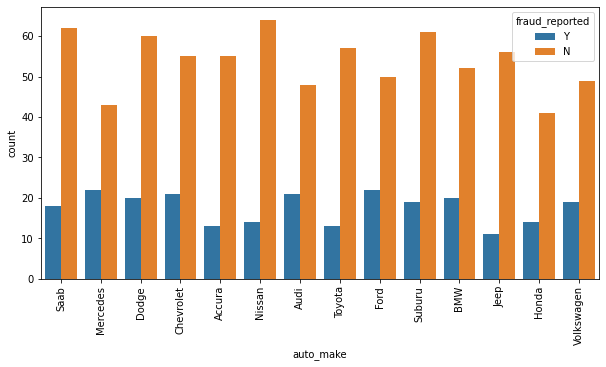

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(df['auto_make'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- Audi , Mercedes , Suburu have the most fraud claims reports, Jeep and Accura have the least

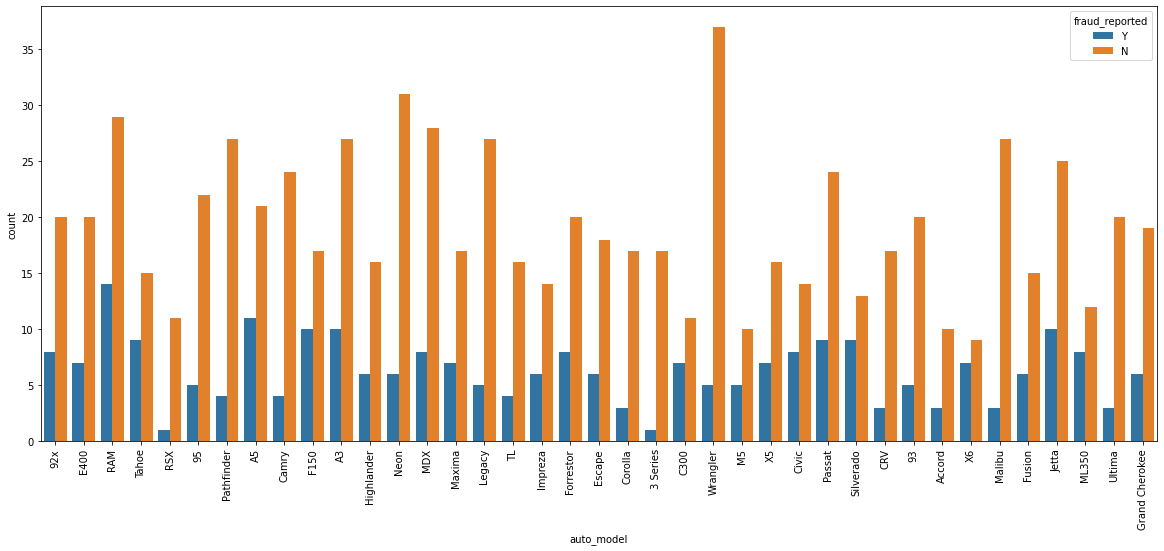

In [73]:
plt.figure(figsize=(20,8))
sns.countplot(df['auto_model'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- auto_model RAM has the most fraud claims reports
- RSX and 3 Series have very low fraud claim reports

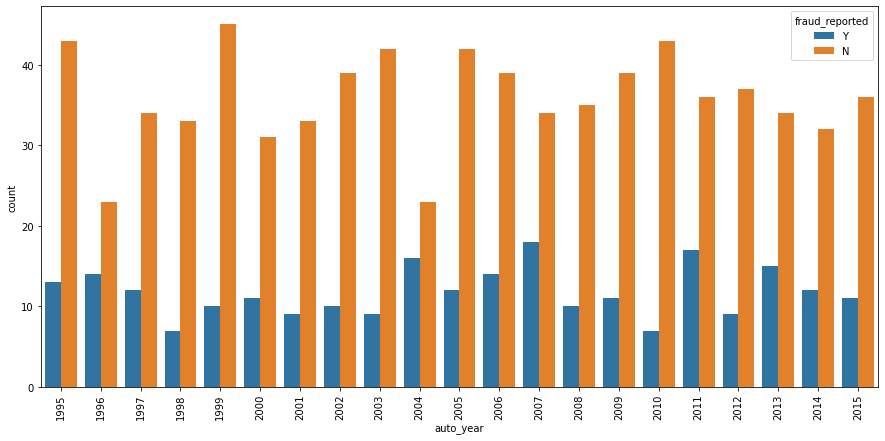

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

- 2007 , 2011 policy blind year had the most fraud reports
- 1998, 2010 had the least

In [78]:
#now lets LabelEncode the object datatype variables

#removing incident_location, as this variable has 1000 unique values so it would be tricky to encode it

cat.remove('incident_location')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])

In [79]:
#now checking for dtypes

df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_state                            int32
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                             int32
insured_education_level                 int32
insured_occupation                      int32
insured_hobbies                         int32
insured_relationship                    int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted                   int32
incident_state                    

In [80]:
#checking for correlation

df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,0.051728,0.005750,-0.048276
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,0.053869,0.015501,-0.037444
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,0.041885,0.005509,-0.040099
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,0.002277,0.071450,-0.007276
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.018973,-0.045345,-0.016466
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,0.009164,-0.050416,-0.049598
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.025183,-0.035355,0.001249
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,-0.045207,0.009961,0.048008
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368,-0.039867,0.015864,-0.001100
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,0.040713,-0.004033,-0.032891


In [81]:
df.corr()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
Day                            0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
Year                          -0.000059
policy_annual_premium         -0.014480


conclusion:

- vehicle_claim , total_claim_amount , property_claim , collision_type have good or fine correlation bond with the target variable
- rest others have poor or weak correlation bond

<Figure size 432x288 with 0 Axes>

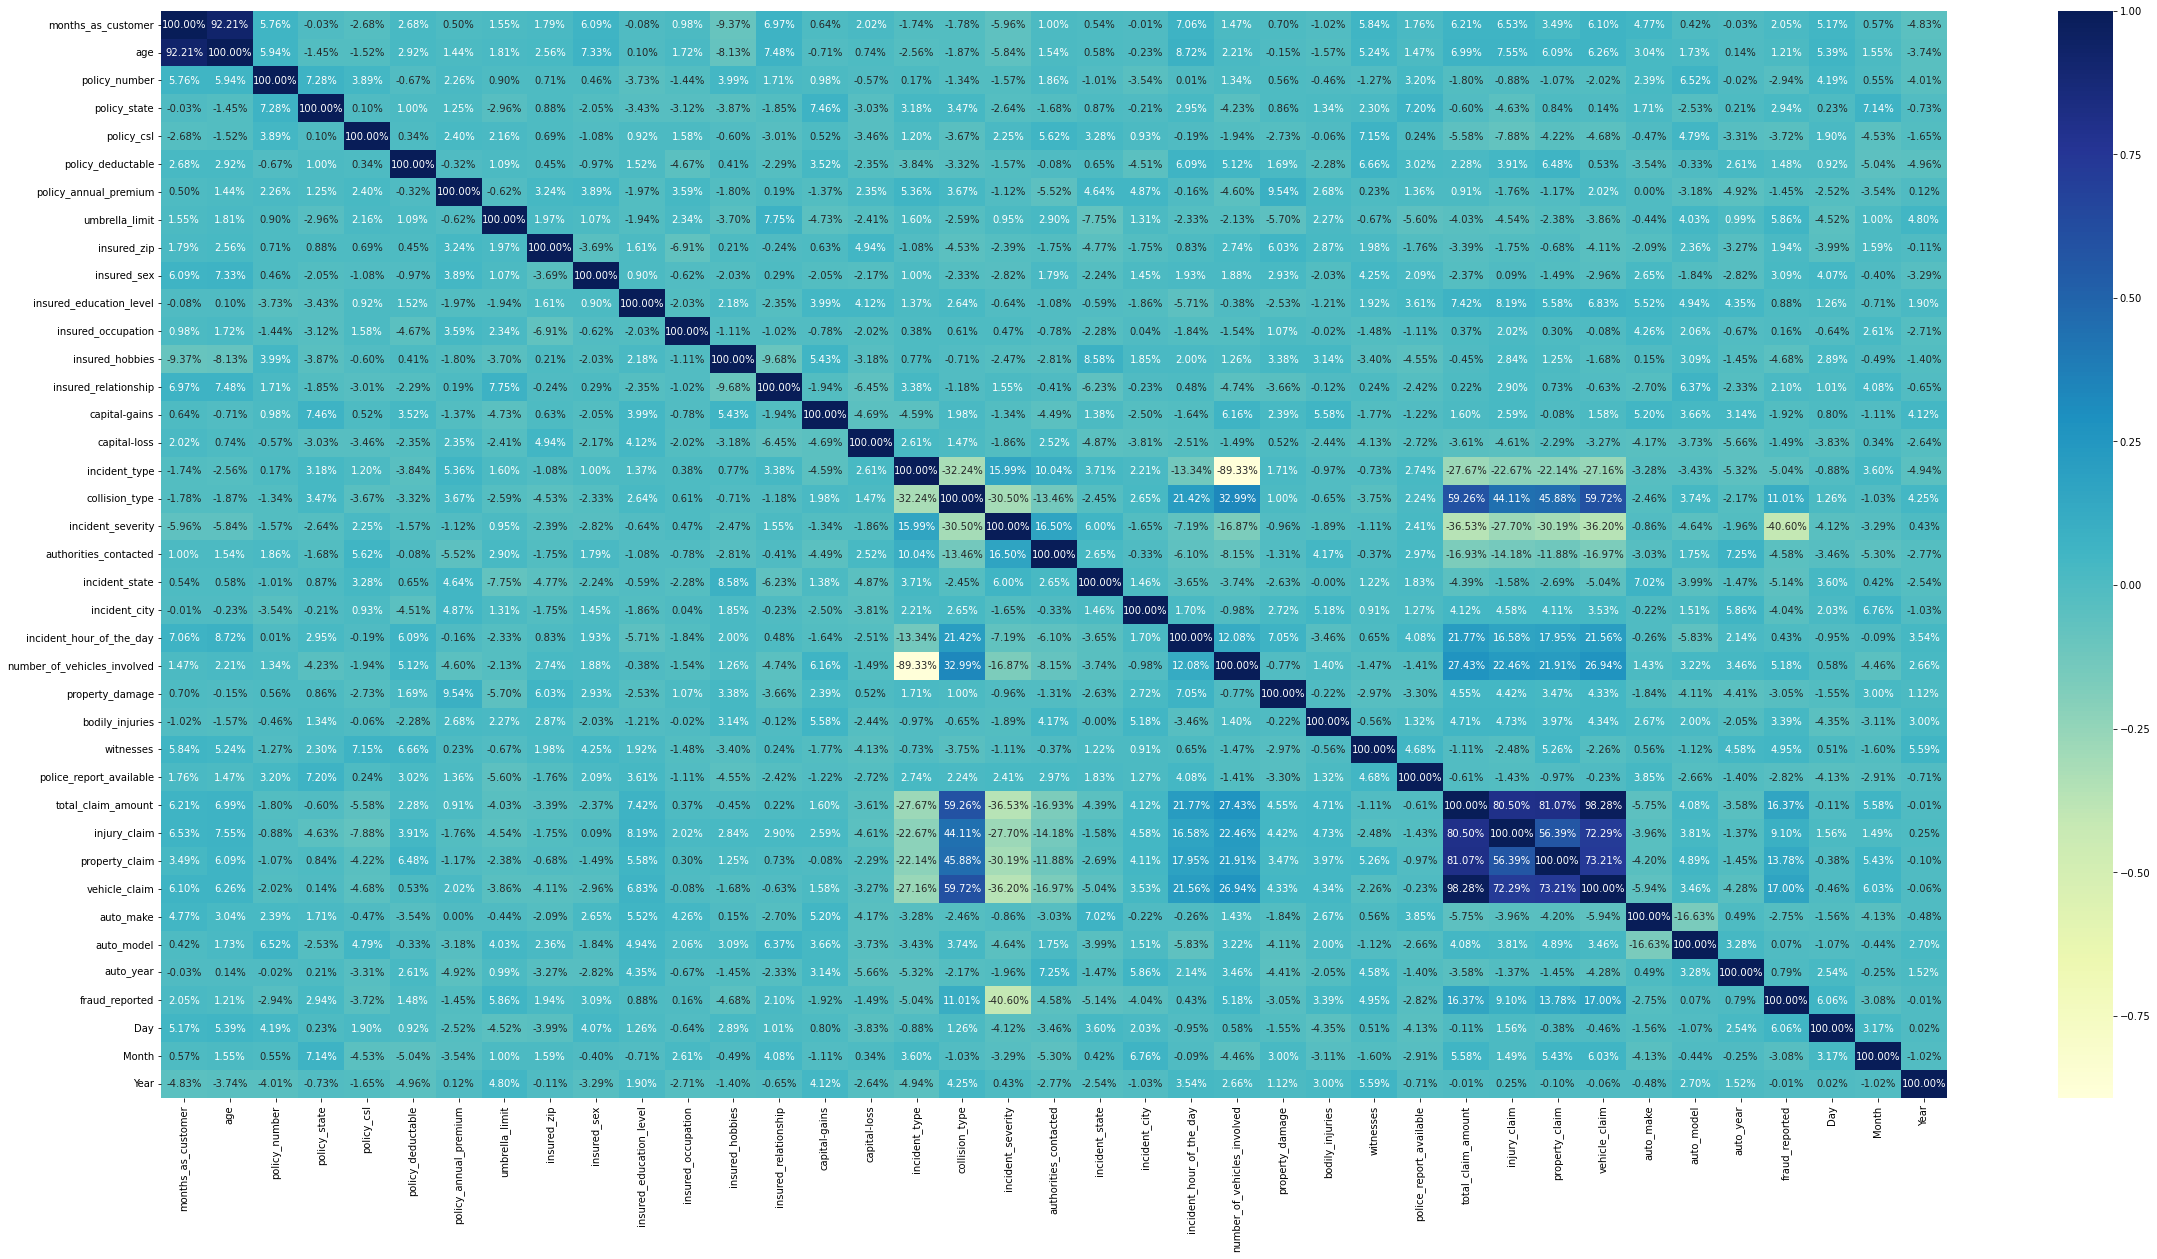

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [83]:
# now let's, describe our dataset:

df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Day,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,8.850176,3.391758,7.360391
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,8.000000,4.000000,1995.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,23.000000,9.000000,2008.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000


observations:
- skewness is present as mean value for many variables is higher or lower than their median value
- the range of dataset is high so outliers might be there too

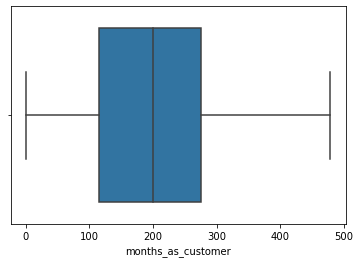

In [84]:
#let's check for outliers

sns.boxplot(df['months_as_customer'])
plt.show()

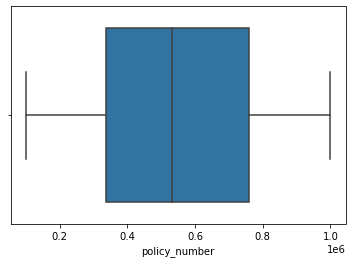

In [85]:
#let's check for outliers

sns.boxplot(df['policy_number'])
plt.show()

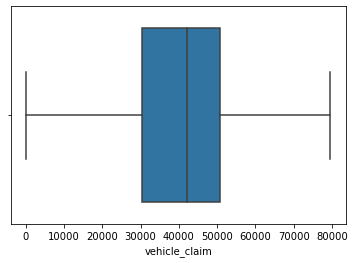

In [86]:
#let's check for outliers

sns.boxplot(df['vehicle_claim'])
plt.show()

# Data Cleaning:

In [88]:
#dropping datetime variable and incident_location

df.drop(['incident_date','incident_location'],axis=1,inplace=True)

In [91]:
df.drop(,axis=1,inplace=True)

In [92]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 30,  7,  7,  7,  6, 15,
         7,  7,  7], dtype=int64))

In [93]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [94]:
df.shape

(1000, 39)

In [95]:
df_new.shape

(980, 39)

In [96]:
print('Data Loss is:',(1000-980)/1000*100,'%')

Data Loss is: 2.0 %


- as the data loss is so low, we will use dataset with no outliers

In [97]:
# now selecting our feature and target variable for further process

x=df_new.drop('fraud_reported',axis=1)
y=df_new['fraud_reported']

print(x.shape)
print(y.shape)

(980, 38)
(980,)


In [98]:
#checking for skewness

x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196


- threshold = -/+ 0.51 , so only total_claim_amount , vehicle_claim , unbrella_limit and insured_zip skewness is exceeding the threshold so we will try to reduce the skewness

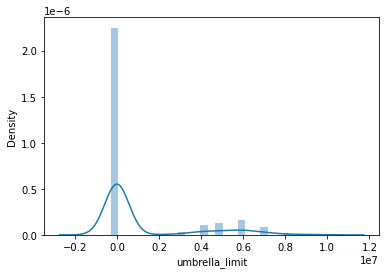

In [103]:
sns.distplot(df['umbrella_limit'])
plt.show()

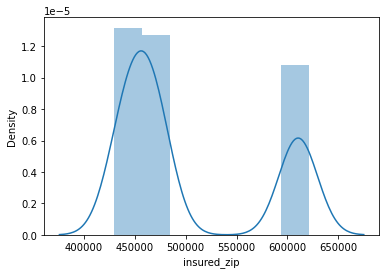

In [104]:
sns.distplot(df['insured_zip'])
plt.show()

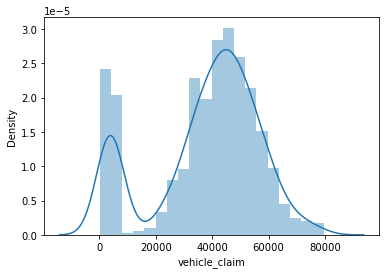

In [105]:
sns.distplot(df['vehicle_claim'])
plt.show()

- so only a little skewness is present, we will try power_transform 

In [107]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'Day', 'Month', 'Year'])
x.skew()

months_as_customer            -0.133972
age                           -0.002183
policy_number                 -0.161791
policy_state                  -0.150765
policy_csl                    -0.096814
policy_deductable              0.022179
policy_annual_premium         -0.007258
umbrella_limit                -7.932397
insured_zip                    0.000000
insured_sex                    0.139324
insured_education_level       -0.187642
insured_occupation            -0.238129
insured_hobbies               -0.248575
insured_relationship          -0.160168
capital-gains                  0.031294
capital-loss                   0.088750
incident_type                 -0.095572
collision_type                -0.204055
incident_severity             -0.079569
authorities_contacted         -0.223816
incident_state                -0.256064
incident_city                 -0.181833
incident_hour_of_the_day      -0.258027
number_of_vehicles_involved    0.372833
property_damage               -0.093063


- skewness has been reduced for all the variables except umbrella_limit, so we will drop it as it has weak correlation with the target variable as well

In [108]:
#dropping umbrella_limit

x.drop('umbrella_limit',axis=1,inplace=True)
x.skew()

months_as_customer            -0.133972
age                           -0.002183
policy_number                 -0.161791
policy_state                  -0.150765
policy_csl                    -0.096814
policy_deductable              0.022179
policy_annual_premium         -0.007258
insured_zip                    0.000000
insured_sex                    0.139324
insured_education_level       -0.187642
insured_occupation            -0.238129
insured_hobbies               -0.248575
insured_relationship          -0.160168
capital-gains                  0.031294
capital-loss                   0.088750
incident_type                 -0.095572
collision_type                -0.204055
incident_severity             -0.079569
authorities_contacted         -0.223816
incident_state                -0.256064
incident_city                 -0.181833
incident_hour_of_the_day      -0.258027
number_of_vehicles_involved    0.372833
property_damage               -0.093063
bodily_injuries               -0.133824


In [109]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [110]:
vif_calc()

    VIF Factor                     features
0     4.729832           months_as_customer
1     4.739515                          age
2     1.033184                policy_number
3     1.040735                 policy_state
4     1.033640                   policy_csl
5     1.046304            policy_deductable
6     1.041145        policy_annual_premium
7          NaN                  insured_zip
8     1.030200                  insured_sex
9     1.040462      insured_education_level
10    1.018720           insured_occupation
11    1.055254              insured_hobbies
12    1.040617         insured_relationship
13    1.038126                capital-gains
14    1.042188                 capital-loss
15   10.254745                incident_type
16    1.900795               collision_type
17    1.192864            incident_severity
18    1.095785        authorities_contacted
19    1.039914               incident_state
20    1.031717                incident_city
21    1.102186     incident_hour

In [112]:
#as for some  variables VIF is very high, multicollinearity is present

#we will deal with it by dropping the variables with high VIF and low correlation bond

x.drop('total_claim_amount',axis=1,inplace=True)


#again checking for VIF

vif_calc()

    VIF Factor                     features
0     4.728834           months_as_customer
1     4.735385                          age
2     1.033012                policy_number
3     1.040626                 policy_state
4     1.030906                   policy_csl
5     1.046303            policy_deductable
6     1.035471        policy_annual_premium
7          NaN                  insured_zip
8     1.028240                  insured_sex
9     1.040461      insured_education_level
10    1.016309           insured_occupation
11    1.051702              insured_hobbies
12    1.040616         insured_relationship
13    1.038109                capital-gains
14    1.042050                 capital-loss
15   10.249438                incident_type
16    1.731325               collision_type
17    1.186090            incident_severity
18    1.079121        authorities_contacted
19    1.036605               incident_state
20    1.028712                incident_city
21    1.100876     incident_hour

In [113]:
#now dropping incident_type

x.drop('incident_type',axis=1,inplace=True)

#now checking for VIF

vif_calc()

    VIF Factor                     features
0     4.728761           months_as_customer
1     4.735136                          age
2     1.030868                policy_number
3     1.040121                 policy_state
4     1.029935                   policy_csl
5     1.045749            policy_deductable
6     1.034825        policy_annual_premium
7          NaN                  insured_zip
8     1.025306                  insured_sex
9     1.039589      insured_education_level
10    1.015877           insured_occupation
11    1.050110              insured_hobbies
12    1.039350         insured_relationship
13    1.037910                capital-gains
14    1.041920                 capital-loss
15    1.730995               collision_type
16    1.185789            incident_severity
17    1.078121        authorities_contacted
18    1.036602               incident_state
19    1.026722                incident_city
20    1.100348     incident_hour_of_the_day
21    1.178050  number_of_vehicl

- now VIF is below than 5 for every variable so we can process further

In [114]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [115]:
#now checking if the dataset is imbalanced or not

y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

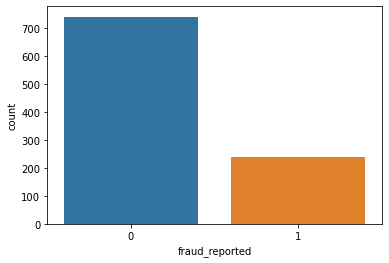

In [116]:
sns.countplot(y)
plt.show()

- the data is imbalanced, so to prevent bias we will do over sampling using SMOTE

In [117]:
from imblearn.over_sampling import SMOTE

train_x,train_y=SMOTE().fit_resample(x,y)

In [118]:
train_x.shape

(1480, 35)

In [119]:
train_y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [120]:
#since this is binary classification problem first we will use LogisticRegression then we will try out some other algos too

In [121]:
#importing libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [122]:
lr=LogisticRegression()

In [123]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(accuracy_score(y_test,predlr)*100,1)==round(accuracy_score(y_train,predtrain)*100,1):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
        print('Testing accuracy score is',accuracy_score(y_test,predlr)*100,'\n')

At random state 63 the model performs very well
At random state 63 :
Training accuracy score is 76.83397683397683
Testing accuracy score is 76.8018018018018 

At random state 77 the model performs very well
At random state 77 :
Training accuracy score is 76.35135135135135
Testing accuracy score is 76.35135135135135 



In [124]:
#using 63 as the random state for further process

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.7680180180180181


In [125]:
print(accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

76.8018018018018
[[174  49]
 [ 54 167]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       223
           1       0.77      0.76      0.76       221

    accuracy                           0.77       444
   macro avg       0.77      0.77      0.77       444
weighted avg       0.77      0.77      0.77       444



In [126]:
#importing metrics

from sklearn.metrics import mean_squared_error

#checking error for LogiosticRegression
mselr=mean_squared_error(y_test,predlr)

print(mselr)

0.23198198198198197


In [127]:
#checking cross validation score for logistic regression

for j in range(2,10):
    lrs=cross_val_score(lr,train_x,train_y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',accuracy_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 75.54054054054053
Accuracy score is: 76.8018018018018 

At cv= 3
Cross Validation Score is: 74.93313952692623
Accuracy score is: 76.8018018018018 

At cv= 4
Cross Validation Score is: 74.5945945945946
Accuracy score is: 76.8018018018018 

At cv= 5
Cross Validation Score is: 75.47297297297297
Accuracy score is: 76.8018018018018 

At cv= 6
Cross Validation Score is: 75.41089277289534
Accuracy score is: 76.8018018018018 

At cv= 7
Cross Validation Score is: 75.47584982307329
Accuracy score is: 76.8018018018018 

At cv= 8
Cross Validation Score is: 75.13513513513513
Accuracy score is: 76.8018018018018 

At cv= 9
Cross Validation Score is: 75.27510881169418
Accuracy score is: 76.8018018018018 



- both cross validation and accuracy_score are around each other only, which means that are model is working well

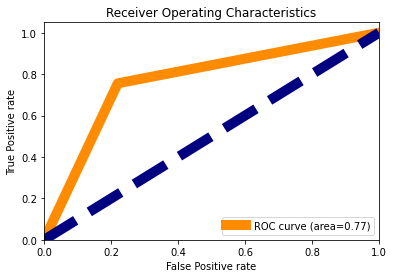

In [128]:
#roc auc plotting for logisticRegression

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,predlr)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [129]:
#now lets try some more classifcation algorithms 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


#KNeighbors

knn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn)*100)

68.01801801801803


In [130]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

68.01801801801803
[[ 90 133]
 [  9 212]]
              precision    recall  f1-score   support

           0       0.91      0.40      0.56       223
           1       0.61      0.96      0.75       221

    accuracy                           0.68       444
   macro avg       0.76      0.68      0.65       444
weighted avg       0.76      0.68      0.65       444



In [131]:
mseknn=mean_squared_error(y_test,predknn)

print(mseknn)

0.31981981981981983


In [132]:
#checking cross validation score for KNeighbors

for j in range(2,10):
    knns=cross_val_score(knn,train_x,train_y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',accuracy_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 67.22972972972974
Accuracy score is: 68.01801801801803 

At cv= 3
Cross Validation Score is: 68.0428837736407
Accuracy score is: 68.01801801801803 

At cv= 4
Cross Validation Score is: 67.97297297297298
Accuracy score is: 68.01801801801803 

At cv= 5
Cross Validation Score is: 68.71621621621622
Accuracy score is: 68.01801801801803 

At cv= 6
Cross Validation Score is: 68.78723544320464
Accuracy score is: 68.01801801801803 

At cv= 7
Cross Validation Score is: 69.05922254442328
Accuracy score is: 68.01801801801803 

At cv= 8
Cross Validation Score is: 69.1891891891892
Accuracy score is: 68.01801801801803 

At cv= 9
Cross Validation Score is: 69.66781637513344
Accuracy score is: 68.01801801801803 



- the model is performing less well with kNeighbors than LogisticRegression

In [133]:
#decisonTree

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc)*100)

82.43243243243244


In [134]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

82.43243243243244
[[177  46]
 [ 32 189]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       223
           1       0.80      0.86      0.83       221

    accuracy                           0.82       444
   macro avg       0.83      0.82      0.82       444
weighted avg       0.83      0.82      0.82       444



In [135]:
msedtc=mean_squared_error(y_test,preddtc)

print(msedtc)

0.17567567567567569


In [137]:
#checking cross validation score for DecsionTree

for j in range(2,10):
    dtcs=cross_val_score(dtc,train_x,train_y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',accuracy_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 80.33783783783784
Accuracy score is: 82.43243243243244 

At cv= 3
Cross Validation Score is: 81.62685149447185
Accuracy score is: 82.43243243243244 

At cv= 4
Cross Validation Score is: 83.17567567567568
Accuracy score is: 82.43243243243244 

At cv= 5
Cross Validation Score is: 82.97297297297297
Accuracy score is: 82.43243243243244 

At cv= 6
Cross Validation Score is: 84.06048736600728
Accuracy score is: 82.43243243243244 

At cv= 7
Cross Validation Score is: 84.47228573983469
Accuracy score is: 82.43243243243244 

At cv= 8
Cross Validation Score is: 84.1891891891892
Accuracy score is: 82.43243243243244 

At cv= 9
Cross Validation Score is: 84.67767101913445
Accuracy score is: 82.43243243243244 



- upto now the model is performing excellent with DecisionTreeCLassifier

In [138]:
#SVC

svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
svc.fit(x_train,y_train)
predtrain=svc.predict(x_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc)*100)

88.51351351351352


In [140]:
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

88.51351351351352
[[192  31]
 [ 20 201]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       223
           1       0.87      0.91      0.89       221

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



In [141]:
msesvc=mean_squared_error(y_test,predsvc)

print(msesvc)

0.11486486486486487


- okay so the model has improved with SVC

In [143]:
#checking cross validation score for SVC

for j in range(2,10):
    svcs=cross_val_score(svc,train_x,train_y,cv=j)
    svcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',svcc*100)
    print('Accuracy score is:',accuracy_score(y_test,predsvc)*100,'\n')

At cv= 2
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 3
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 4
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 5
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 6
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 7
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 8
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 

At cv= 9
Cross Validation Score is: 84.67767101913445
Accuracy score is: 88.51351351351352 



# Ensemble:

In [144]:
#now, let's try some ensemble techniques:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [145]:
#RandomForestClassifier

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf)*100)

88.96396396396396


In [146]:
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

88.96396396396396
[[195  28]
 [ 21 200]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       223
           1       0.88      0.90      0.89       221

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



- though both RandomForest and SVC are giving similar accuarcy score, RandomForest is giving better results in context with recall and precision

In [147]:
mserf=mean_squared_error(y_test,predrf)

print(mserf)

0.11036036036036036


In [148]:
#checking cross validation score for RandomForest

for j in range(2,10):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',accuracy_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 86.82432432432432
Accuracy score is: 88.96396396396396 

At cv= 3
Cross Validation Score is: 86.76450057895558
Accuracy score is: 88.96396396396396 

At cv= 4
Cross Validation Score is: 88.3108108108108
Accuracy score is: 88.96396396396396 

At cv= 5
Cross Validation Score is: 87.97297297297297
Accuracy score is: 88.96396396396396 

At cv= 6
Cross Validation Score is: 88.18477557245208
Accuracy score is: 88.96396396396396 

At cv= 7
Cross Validation Score is: 87.98942272071129
Accuracy score is: 88.96396396396396 

At cv= 8
Cross Validation Score is: 88.78378378378379
Accuracy score is: 88.96396396396396 

At cv= 9
Cross Validation Score is: 88.73573129670692
Accuracy score is: 88.96396396396396 



- model is working extremely well with RandomForestClassifier

In [150]:
#AdaBoostClassifier

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
ada.fit(x_train,y_train)
predtrain=ada.predict(x_train)
predada=ada.predict(x_test)

print(accuracy_score(y_test,predada)*100)

86.03603603603604


In [151]:
print(accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

86.03603603603604
[[196  27]
 [ 35 186]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       223
           1       0.87      0.84      0.86       221

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444



In [152]:
mseada=mean_squared_error(y_test,predada)

print(mseada)

0.13963963963963963


In [153]:
#checking cross validation score for AdaBoost

for j in range(2,10):
    adas=cross_val_score(ada,train_x,train_y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',accuracy_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 80.67567567567568
Accuracy score is: 86.03603603603604 

At cv= 3
Cross Validation Score is: 79.74394560281183
Accuracy score is: 86.03603603603604 

At cv= 4
Cross Validation Score is: 83.58108108108108
Accuracy score is: 86.03603603603604 

At cv= 5
Cross Validation Score is: 84.66216216216218
Accuracy score is: 86.03603603603604 

At cv= 6
Cross Validation Score is: 83.39093512392614
Accuracy score is: 86.03603603603604 

At cv= 7
Cross Validation Score is: 84.95228727277373
Accuracy score is: 86.03603603603604 

At cv= 8
Cross Validation Score is: 84.7972972972973
Accuracy score is: 86.03603603603604 

At cv= 9
Cross Validation Score is: 85.02710027100271
Accuracy score is: 86.03603603603604 



In [155]:
#GradientBoostingClassifier

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
gb.fit(x_train,y_train)
predtrain=gb.predict(x_train)
predgb=gb.predict(x_test)

print(accuracy_score(y_test,predgb)*100)

88.73873873873875


In [156]:
print(accuracy_score(y_test,predgb)*100)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

88.73873873873875
[[190  33]
 [ 17 204]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       223
           1       0.86      0.92      0.89       221

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



- GradientBoosting is giving us similar accuracy score to that of RandomForest but poor recall than it

In [157]:
msegb=mean_squared_error(y_test,predgb)

print(msegb)

0.11261261261261261


In [158]:
#checking cross validation score for GradientBoosting

for j in range(2,6):
    gbs=cross_val_score(gb,train_x,train_y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',accuracy_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 82.63513513513514
Accuracy score is: 88.73873873873875 

At cv= 3
Cross Validation Score is: 80.62195979885742
Accuracy score is: 88.73873873873875 

At cv= 4
Cross Validation Score is: 86.21621621621621
Accuracy score is: 88.73873873873875 

At cv= 5
Cross Validation Score is: 87.0945945945946
Accuracy score is: 88.73873873873875 



In [159]:
from sklearn.metrics import accuracy_score as acs

algodf=pd.DataFrame({'Mean Squared Error':[mselr,mseknn,msedtc,msesvc,mseada,msegb,mserf],'Accuracy Score':[acs(y_test,predlr),acs(y_test,predknn),acs(y_test,preddtc),acs(y_test,predsvc),acs(y_test,predada),acs(y_test,predgb),acs(y_test,predrf)]},index=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','AdaBoostClassifer','GradientBoostingClassifier','RabdomForestClassifier'])
algodf

,Mean Squared Error,Accuracy Score
LogisticRegression,0.231982,0.768018
KNeighborsClassifier,0.319820,0.680180
DecisionTreeClassifier,0.175676,0.824324
SVC,0.114865,0.885135
AdaBoostClassifer,0.139640,0.860360
GradientBoostingClassifier,0.112613,0.887387
RabdomForestClassifier,0.110360,0.889640


- RandomForestClassifier has lower error, higher accuracy score and great recall and precision than SVC and GradientBoostingClassifier, so we will go ahead with RandomForestClassifer

In [162]:
#doing hyperparametertuning on RandomForest for best results

from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto']}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2'}


In [167]:
#finding a good random state

for i in range(10):
    rf=RandomForestClassifier(criterion='gini',max_features='log2')
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    
    print('At random state:',i)
    print(accuracy_score(y_test,predrf)*100,'\n')

At random state: 0
89.63963963963964 

At random state: 1
88.51351351351352 

At random state: 2
89.41441441441441 

At random state: 3
84.68468468468468 

At random state: 4
90.31531531531532 

At random state: 5
88.51351351351352 

At random state: 6
88.73873873873875 

At random state: 7
90.76576576576578 

At random state: 8
86.03603603603604 

At random state: 9
88.73873873873875 



In [172]:
#using the random state as 2

rf=RandomForestClassifier(criterion='gini', max_features= 'log2')
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=2,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

89.41441441441441


In [164]:
#checking for cross validation score

rf=RandomForestClassifier(criterion='gini',max_features='log2')
for j in range(10,21):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 10
Cross Validation Score is: 88.5810810810811 

At cv= 11
Cross Validation Score is: 89.00397004874617 

At cv= 12
Cross Validation Score is: 87.73330273625318 

At cv= 13
Cross Validation Score is: 89.06106314117494 

At cv= 14
Cross Validation Score is: 88.53099730458221 

At cv= 15
Cross Validation Score is: 88.73840445269016 

At cv= 16
Cross Validation Score is: 88.61179289387564 

At cv= 17
Cross Validation Score is: 89.06278812465426 

At cv= 18
Cross Validation Score is: 89.0807130962876 

At cv= 19
Cross Validation Score is: 89.39744466060257 

At cv= 20
Cross Validation Score is: 89.1891891891892 



In [180]:
#checking for cross validation score at cv=19

rf=RandomForestClassifier(criterion='gini', max_features= 'log2')
rfs=cross_val_score(rf,train_x,train_y,cv=19)
rfc=rfs.mean()
print('Cross Validation Score is:',rfc*100,'\n')

Cross Validation Score is: 89.26424452740243 



In [181]:
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       222
           1       0.90      0.89      0.89       222

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444

[[200  22]
 [ 25 197]]


- the recall is excellent and so is precision

In [182]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 0.10585585585585586
Root Mean Squared Error: 0.32535496900440275


- the errors are low as well

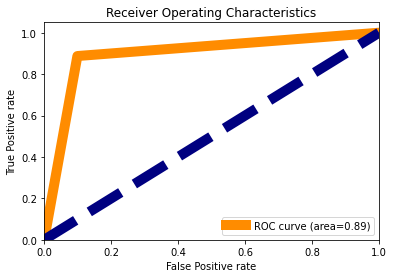

In [183]:
#roc auc plotting


fpr,tpr,thresholds=roc_curve(y_test,predrf)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [188]:
print('The model is performing extremely well with RandomForestClassifier','\n')
print('Accuracy:',round(accuracy_score(y_test,predrf)*100,1))
print('Cross Validation Score:',round(rfc*100,1))
print('Area Under Curve:',round(auc(fpr,tpr),3))

The model is performing extremely well with RandomForestClassifier 

Accuracy: 89.4
Cross Validation Score: 89.3
Area Under Curve: 0.894


In [187]:
preddf=pd.DataFrame({'Fraud Reported':y_test,'Predicted Fraud Reported':predrf})
preddf

,Fraud Reported,Predicted Fraud Reported
323,0,0
1059,1,0
1260,1,1
263,0,0
571,0,0
...,...,...
547,0,0
1259,1,1
981,1,1
472,0,0
